### 向量化
首先，对之前的theta_0求导的结果，乘以X_0（这是一列全为1的向量）。
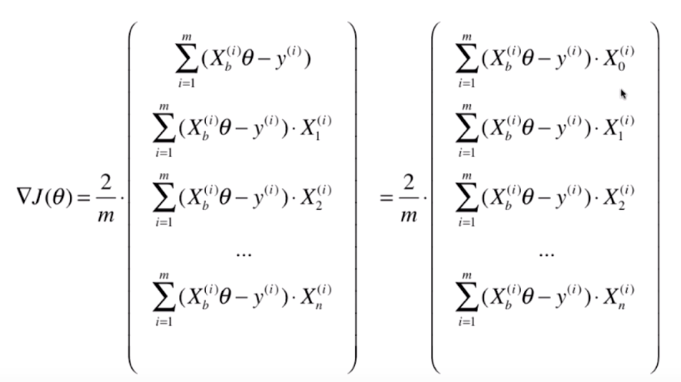
对上述的向量，其实可以看成如下的矩阵和向量的运算：
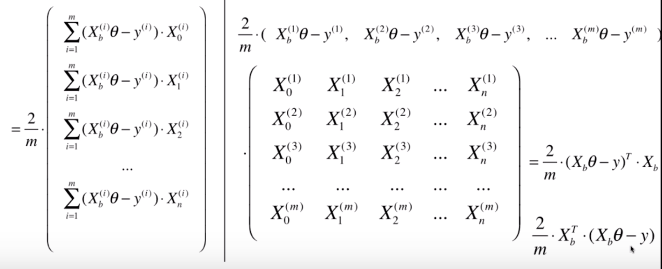
因为是1\*m的向量乘以m\*n+1的矩阵。故最后对结果进行一次转置，得到最终结果
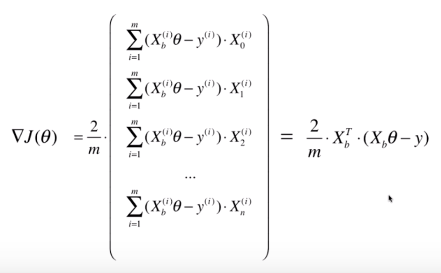

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train) # 利用正规方程求解
lin_reg1.score(X_test, y_test)

Wall time: 3.6 ms


0.8129794056212907

### 使用梯度下降法

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)  # 利用批量梯度下降求解

C:\Users\William\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\William\Documents\Python Scripts\04_梯度下降\playML\LinearRegression.py:39: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
C:\Users\William\Documents\Python Scripts\04_梯度下降\playML\LinearRegression.py:61: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


LinearRegression()

In [6]:
# 这里输出的警告信息，主要是因为我们的真实数据没有经过归一化处理，每一个特征之间可能差别过大
# 导致利用梯度下降无法收敛
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [7]:
X_train[:10, :]  # 特征之间可能并处于同一个数量级，故建议进行归一化处理

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [8]:
lin_reg2.fit_gd(X_train, y_train, eta = 0.000001)

LinearRegression()

In [9]:
lin_reg2.score(X_test, y_test)  # 可以发现性能很差，主要是因为学习率设置的太小了。导致达到了默认迭代次数后，还没有达到最低点

0.27586818724477236

In [10]:
%time lin_reg2.fit_gd(X_train, y_train, eta = 0.000001, n_iters = 1e6) # 调整迭代次数

Wall time: 1min 12s


LinearRegression()

In [11]:
lin_reg2.score(X_test, y_test) # 可以发现性能得到了提高，但还没达到最小值

0.7542932581943915

### 使用梯度下降法之前，最好进行数据归一化

由于有eta这个变量，如果数值之间差距过大，将影响梯度的结果。eta乘以梯度的结果就是真正的步长便有可能太大或太小。
- 步长太大，导致不收敛
- 步长太小，导致查找时间过长

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler()

In [14]:
X_train_standard = standardScaler.transform(X_train)

In [15]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)  # 可以发现速度提高了很多

Wall time: 368 ms


LinearRegression()

In [16]:
X_test_standard = standardScaler.transform(X_test)
lin_reg3.score(X_test_standard, y_test)  # 精度和正规方程解的一样

0.8129873310487505

### 梯度下降法的优势

In [17]:
m = 1000  # 样本数
n = 5000  # 特征数

big_X = np.random.normal(size = (m, n))  # 正太分布，已经归一化了
true_theta = np.random.uniform(0.0, 100.0, size = n + 1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size = m)

In [18]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y) # 使用正规方程解

Wall time: 1.79 s


LinearRegression()

In [ ]:
big_reg2 = LinearRegression()
%time big_reg2.fit _gd(big_X, big_y)  # 使用梯度下降。
# 可以发现当数据量比较大时，采用梯度下降法，效率是比较高的

### 批量梯度下降法的不足

- 可以根据公式发现，theta向量中的每一个元素，都和样本数量相关。如果样本数量特别大，那么求解的时间也会变得很大。
- 解决方案：随机梯度下降